# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [583]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [584]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [585]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

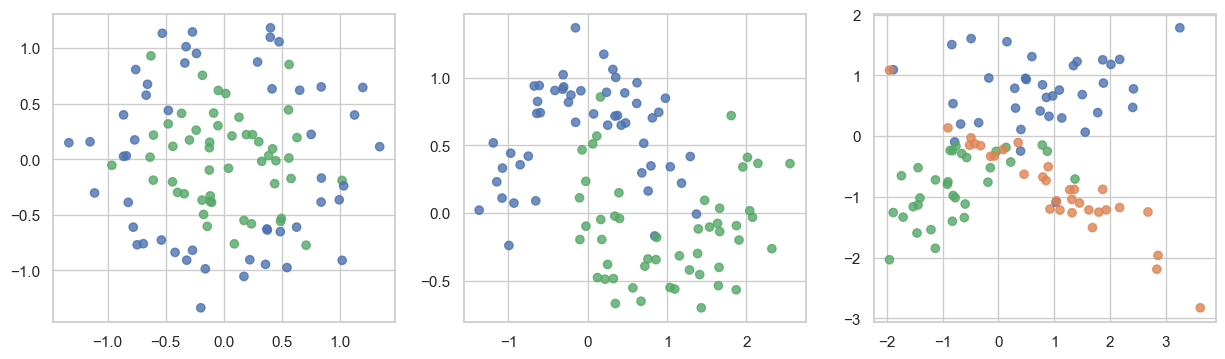

In [586]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i+1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [587]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

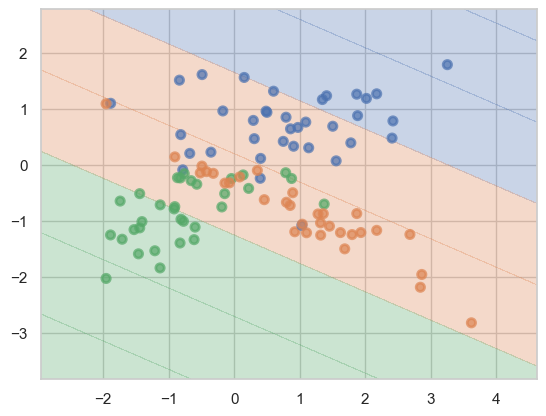

In [588]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [589]:
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(len(datasets)):
    X_train.append('reserve data')
    X_test.append('reserve data')
    y_test.append('reserve data')
    y_train.append('reserve data')

In [590]:
for i in range(len(datasets)):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(*datasets[i],random_state=42,test_size=0.3)

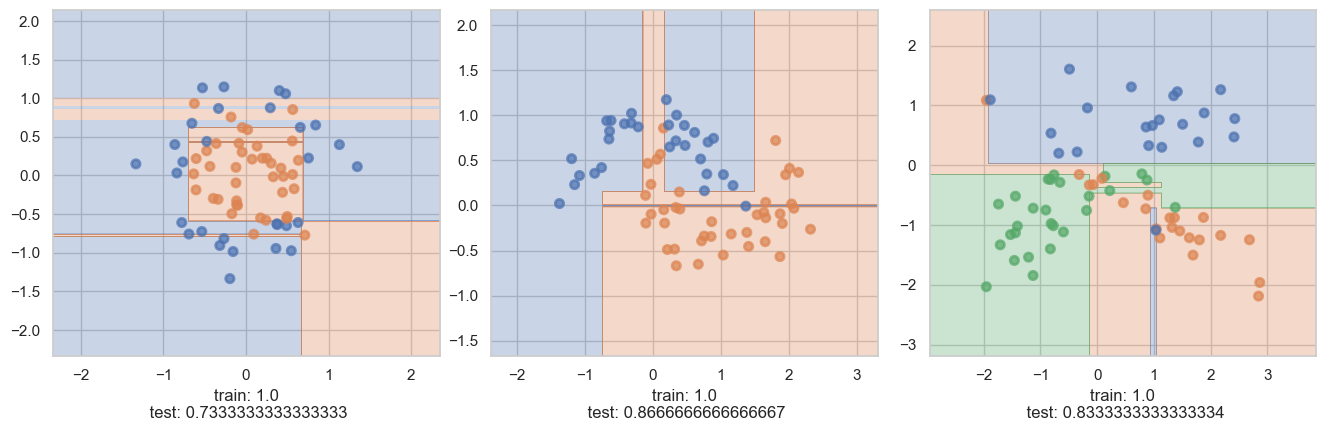

In [591]:
accuracy = []
plt.figure(figsize=(14, 5))
for i in range(len(datasets)):
    clf = DecisionTreeClassifier(random_state=42).fit(X_train[i],y_train[i])
    accuracy.append(((clf.predict(X_train[i]) == y_train[i]).sum()/len(y_train[i]),
                    (clf.predict(X_test[i]) == y_test[i]).sum()/len(y_test[i])))
    plt.subplot2grid((1, 3), (0, i))
    plot_surface(clf,X_train[i],y_train[i])
    plt.xlabel("train: "+str((clf.predict(X_train[i]) == y_train[i]).sum()/len(y_train[i]))+"\n test: "+
              str((clf.predict(X_test[i]) == y_test[i]).sum()/len(y_test[i])))

In [592]:
accuracy

[(1.0, 0.7333333333333333),
 (1.0, 0.8666666666666667),
 (1.0, 0.8333333333333334)]

__Ответ:__ деревья полностью переобучились. Они подстроились под все выбросы на train. Но accuracy на тесте примерно 0.8

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

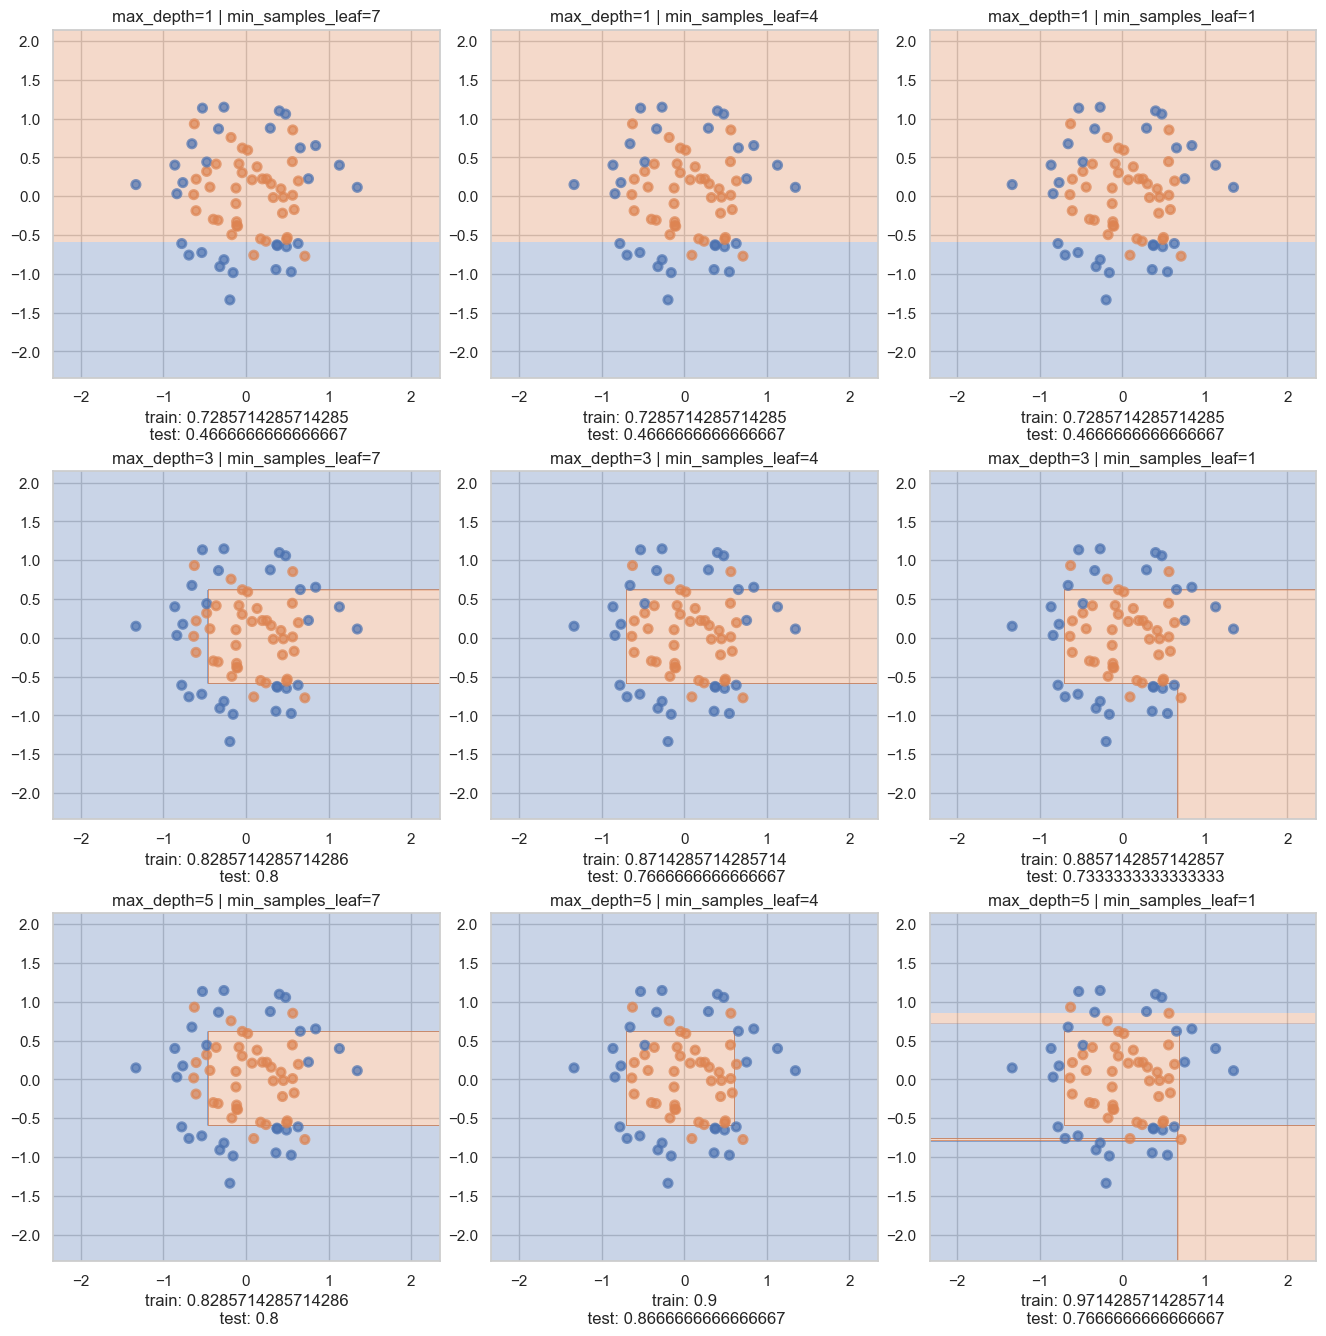

In [593]:
plt.figure(figsize=(14, 14))
dataset = 0
for i, max_depth in enumerate([1, 3, 5]):
    for j, min_samples_leaf in enumerate([7, 4, 1]):
        clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train[dataset],y_train[dataset])
        plt.subplot2grid((3, 3), (i, j))
        plot_surface(clf,X_train[dataset],y_train[dataset])
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        plt.xlabel("train: "+str((clf.predict(X_train[dataset]) == y_train[dataset]).sum()/len(y_train[dataset]))+"\n test: "+
              str((clf.predict(X_test[dataset]) == y_test[dataset]).sum()/len(y_test[dataset])))

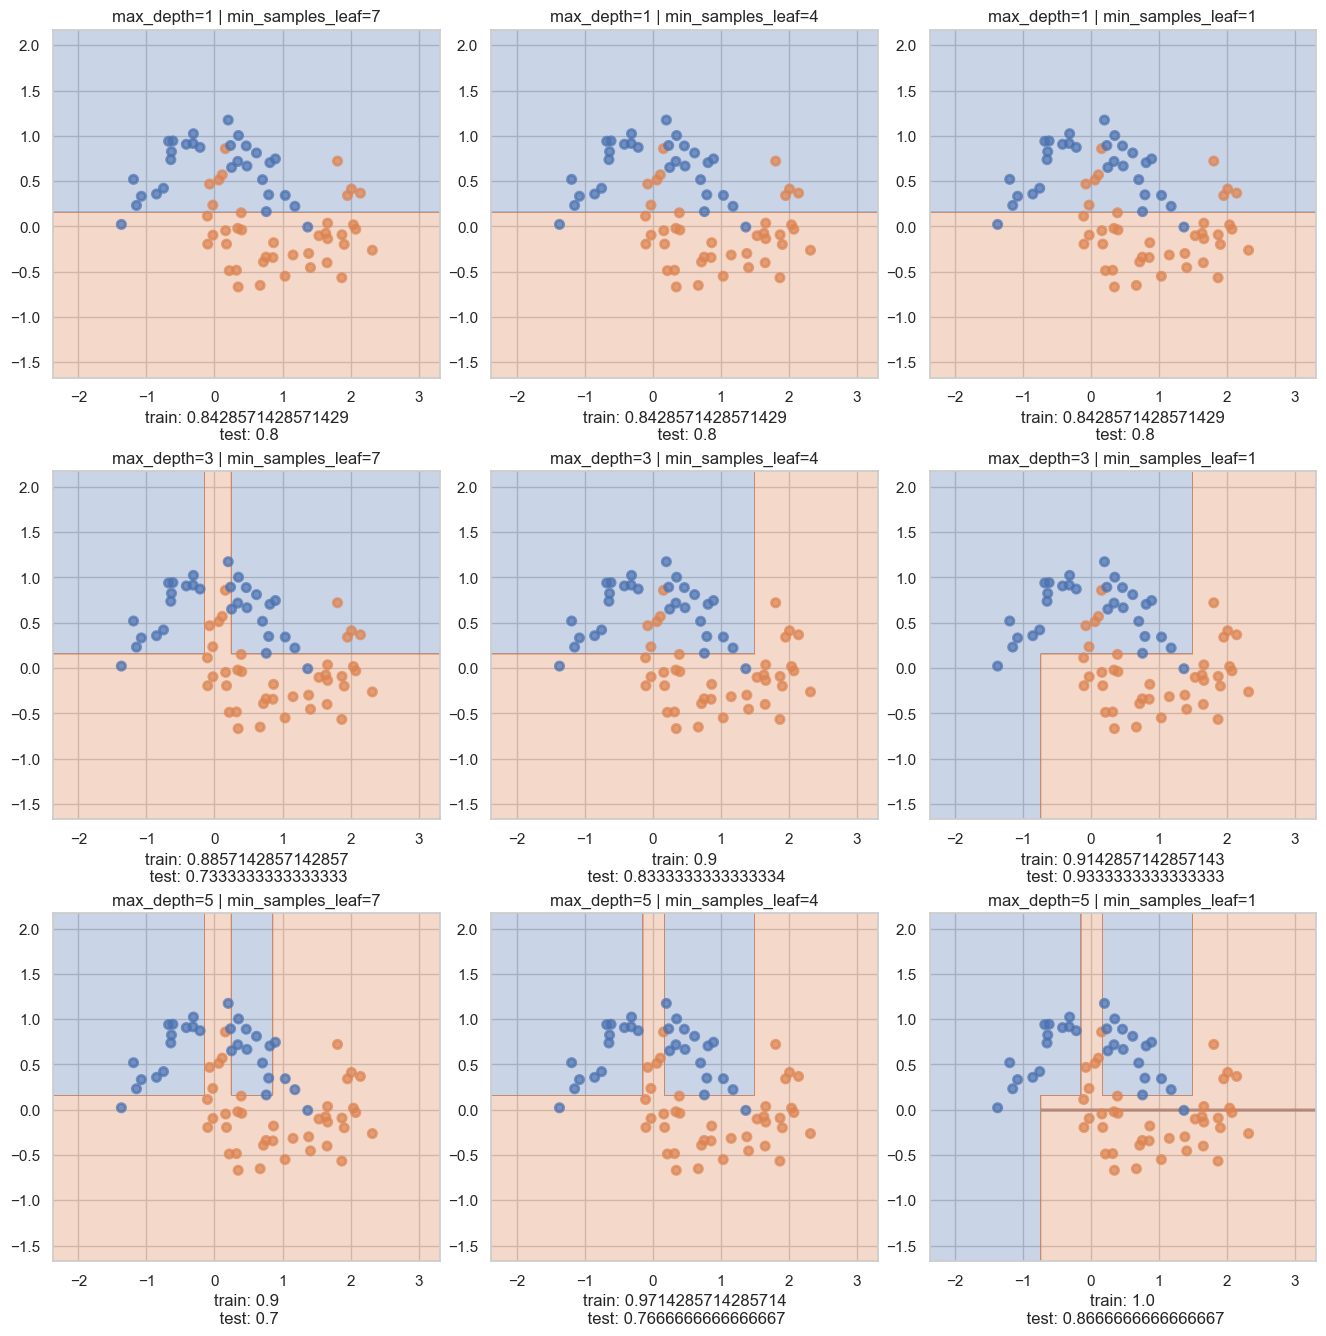

In [594]:
plt.figure(figsize=(14, 14))
dataset = 1
for i, max_depth in enumerate([1, 3, 5]):
    for j, min_samples_leaf in enumerate([7, 4, 1]):
        clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train[dataset],y_train[dataset])
        plt.subplot2grid((3, 3), (i, j))
        plot_surface(clf,X_train[dataset],y_train[dataset])
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        plt.xlabel("train: "+str((clf.predict(X_train[dataset]) == y_train[dataset]).sum()/len(y_train[dataset]))+"\n test: "+
              str((clf.predict(X_test[dataset]) == y_test[dataset]).sum()/len(y_test[dataset])))

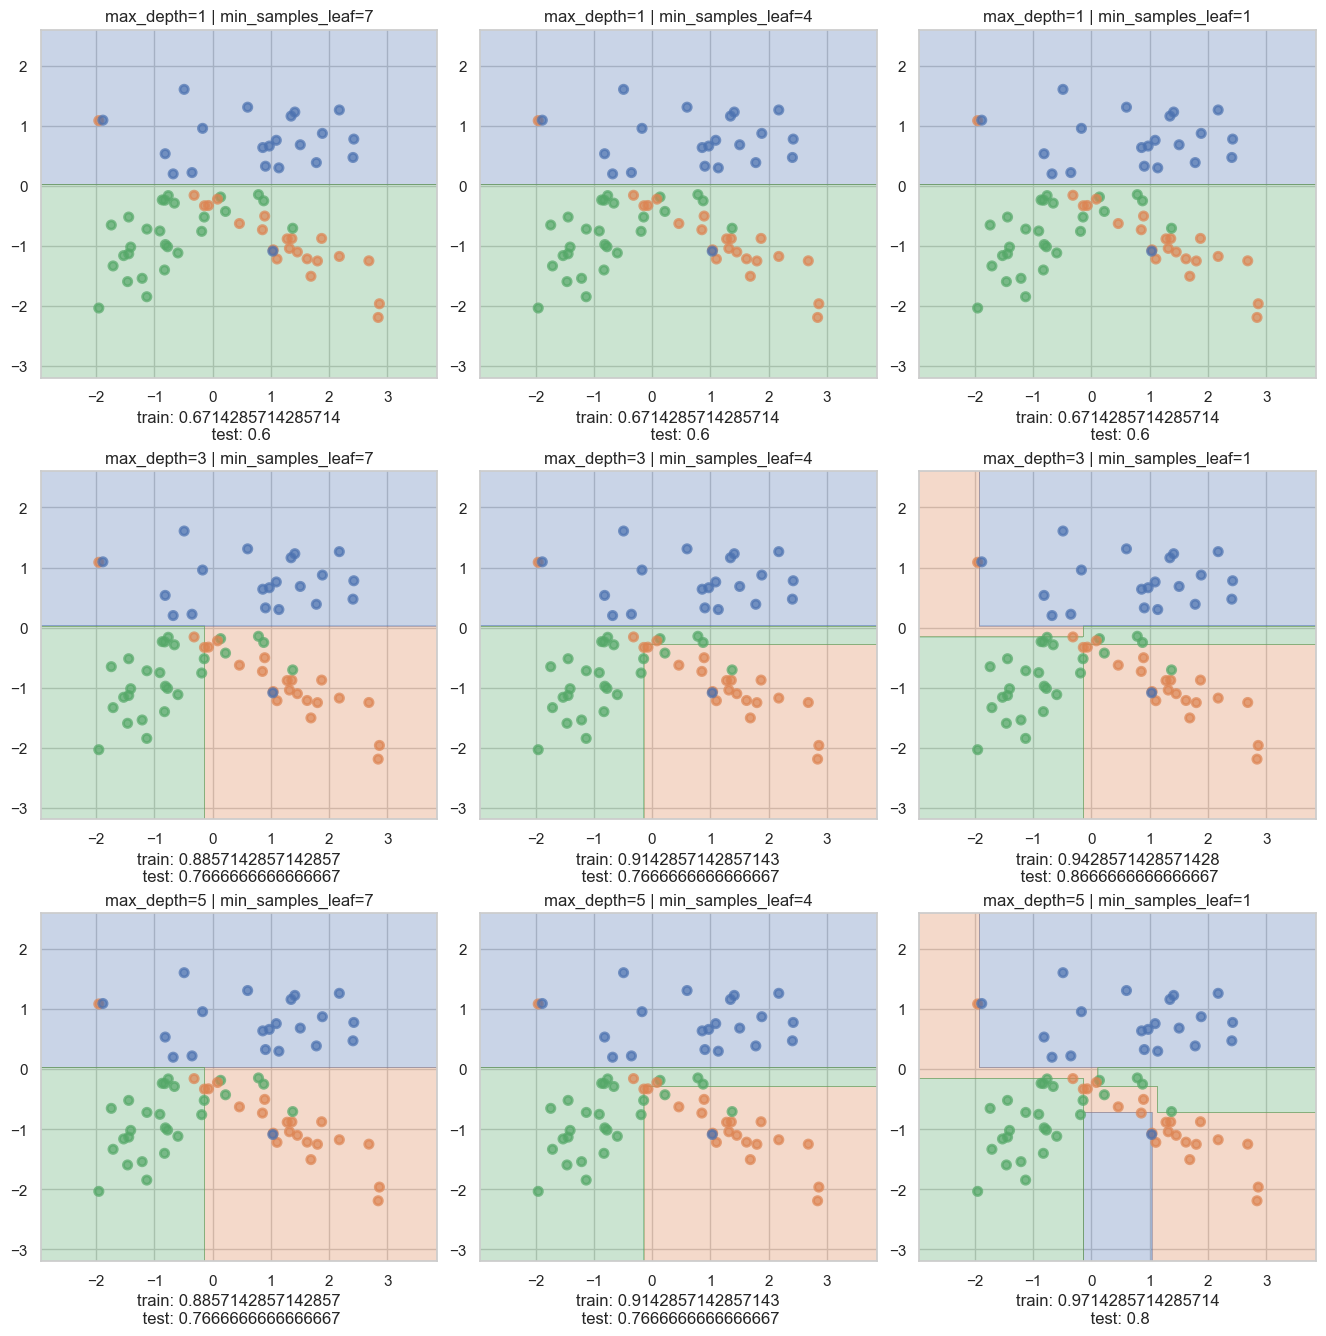

In [595]:
plt.figure(figsize=(14, 14))
dataset = 2
for i, max_depth in enumerate([1, 3, 5]):
    for j, min_samples_leaf in enumerate([7, 4, 1]):
        clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train[dataset],y_train[dataset])
        plt.subplot2grid((3, 3), (i, j))
        plot_surface(clf,X_train[dataset],y_train[dataset])
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        plt.xlabel("train: "+str((clf.predict(X_train[dataset]) == y_train[dataset]).sum()/len(y_train[dataset]))+"\n test: "+
              str((clf.predict(X_test[dataset]) == y_test[dataset]).sum()/len(y_test[dataset])))

__Ответ:__ тенденция обучение при разных гипер параметрах одинаковая. Если глубина слишком большая дерево переобучается. Если маленькая недообучается. Если минимальное кол-во листов маленькое, то чаще происходит переобучение на отдельные выбросы.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [596]:
thresholds[:-1] != thresholds[1:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [597]:
def find_best_split(feature_vector, target_vector):
    def gini(x):
        target_vector0 = target_vector[feature_vector<=x]
        target_vector1 = target_vector[feature_vector>x]
        p0 = len(target_vector0[np.isclose(target_vector0,0)]) / len(target_vector0)
        p1 = len(target_vector1[np.isclose(target_vector1,0)]) / len(target_vector1)
        g = ((len(target_vector0) / len(target_vector) * (1-p0**2-(1-p0)**2))
            + (len(target_vector1) / len(target_vector) * (1-p1**2-(1-p1)**2)))
        return g
        
    thresholds = np.sort(feature_vector)
    thresholds = thresholds[np.concatenate((np.array([True]),thresholds[:-1] != thresholds[1:]))]
    thresholds = (thresholds[:-1] + thresholds[1:]) / 2
    ginies = np.array(list(map(gini, thresholds)))
    if (len(ginies)!=0):
        threshold_best = thresholds[np.argmin(ginies)]
        gini_best = ginies.min()
        return thresholds, ginies, threshold_best, gini_best
    else:
        return [],[],-np.inf,-np.inf

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [598]:
data = pd.read_csv('students.csv')
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


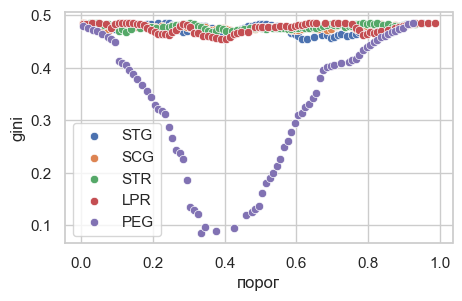

In [599]:
fig, ax = plt.subplots(figsize = ( 5 , 3 ))
for feature in features:
    thresholds, ginies, _, _ = find_best_split(np.array(data[feature]), np.array(data.UNS)) 
    sns.scatterplot(thresholds,ginies, label=feature, ax= ax)
ax.set_xlabel('порог')
ax.set_ylabel('gini')
plt.show()

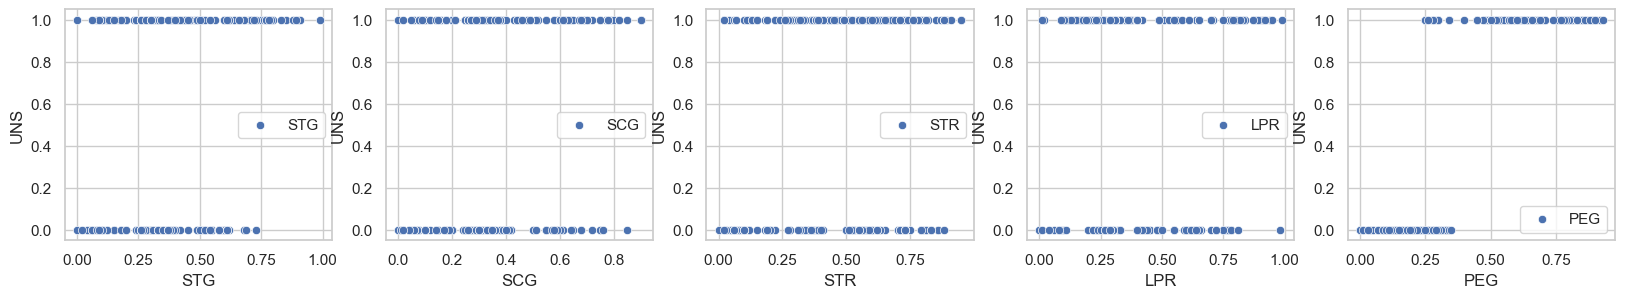

In [600]:
fig, ax = plt.subplots(ncols=5,figsize = ( 20 , 3 ))
for i, feature in enumerate(features):
    sns.scatterplot(data= data,x = feature,y = 'UNS', label=feature, ax= ax[i])
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('UNS')
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
1) Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева?
Стоит разбивать по PEG так как там при границе ~0.4 критерий gini низкий

2)  Согласуется ли этот результат с визуальной оценкой scatter-графиков?
Да согласаутеся. Мы видим что до 0.4 0-вой класс, а после 0.4 1-ый класс

3)  Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально?
Если выборка делится хорошо, то при определенном значении по x(границе) слева и справа будут разные классы.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [601]:
Counter()

Counter()

In [743]:
from collections import Counter
class DecisionTree:
    def __init__(self, feature_types, _tree = None, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x not in ['float','real','int','uint8'] and x not in ["categorical","object"], feature_types))):
            raise ValueError("There is unknown feature type")
        if (_tree == None):
            _tree = {}
        self.real = ['float','real','int','uint8']
        self.categorical = ["categorical","object"]
        self._tree = _tree
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X : np.ndarray, sub_y : np.ndarray, node):
        sub_X,sub_y = np.array(sub_X),np.array(sub_y) 
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type in self.real:
                feature_vector = sub_X[:, feature]
            elif feature_type in self.categorical:
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                        ratio[key] = current_count / current_click
                    else:
                        current_click = 0
                        ratio[key] = 0
            
                categories_map = dict(sorted(ratio.items(), key=lambda x: x[1]))
                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if len(feature_vector) == 3:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type in self.real:
                    threshold_best = threshold
                elif feature_type in self.categorical:
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] in self.real:
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] in self.categorical:
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        x = np.array(x)
        if node['type'] == 'terminal':
            return node['class']
        if node['type'] == 'nonterminal':
            feature = node['feature_split']
            value = x[feature]
            split_left = ''
            if ('threshold' in node):
                split_left = (value < node["threshold"])
            elif ("categories_split" in node):
                split_left = value in node["categories_split"]
            else: 
                raise ValueError
            if split_left:
                return self._predict_node(x,node["left_child"])
            else:
                return self._predict_node(x,node["right_child"])
        else:
            raise ValueError
            

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        if (type(X) == pd.DataFrame):
            X = X.to_numpy()
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)
    def get_params(self, deep = False):
        return {'_tree':self._tree,
               'feature_types':self._feature_types}


__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [603]:
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

100% [............................................................................] 373704 / 373704

'agaricus-lepiota (4).data'

In [724]:
data = pd.read_csv('agaricus-lepiota.data',delimiter=',')

In [725]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer
label_econder = LabelEncoder()
data['p'] = label_econder.fit_transform(data['p'])
#data = data.apply(lambda x: label_econder.fit_transform(x))
X = data.drop('p',axis=1)
Y = data['p']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=42)

In [726]:
from sklearn.metrics import accuracy_score
tree = DecisionTree(X_train.dtypes)
tree.fit(X_train,y_train)
accuracy_score(tree.predict(X_test),y_test)

0.9913835548990645

In [727]:
tree = DecisionTree(X_train.dtypes)
cross_val_score(tree,X_train,y_train,scoring='accuracy',cv=10)

array([0.997543  , 0.97783251, 0.98029557, 0.99753695, 0.99014778,
       0.99261084, 0.99261084, 0.99014778, 0.99261084, 0.98029557])

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [770]:
info = pd.DataFrame(columns=['DecisionTree float','DecisionTree cat','DecisionTree cat + oneHot','DecisionTreeClassifier из sklearn'])
info = info.append(['mushrooms','tic-tac-toe','cars','nursery'])
info.index = ['mushrooms','tic-tac-toe','cars','nursery']

In [651]:
urls = ['https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
       'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
       'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
       'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data']

In [701]:
from sklearn.utils import shuffle
names = ['mushrooms','tic-tac-toe','cars','nursery']
datasets = {}
for i in range(len(urls)):
    datasets[names[i]] = shuffle(pd.read_csv(urls[i],delimiter=','), random_state=42)

In [702]:
number_collumn = {'mushrooms' : 0,'tic-tac-toe': -1,'cars': -1,'nursery': -1}

In [703]:
for name, dataset in datasets.items():
    datasets[name] = [dataset.drop(dataset.columns[number_collumn[name]],axis = 1),
                      dataset[dataset.columns[number_collumn[name]]]]

In [704]:
def transform_target(y:pd.Series, names_zero_class = None):
    if (names_zero_class != None):
        return y.apply(lambda x: x not in names_zero_class).astype('int')
    else:
        label_encoder = LabelEncoder()
        return label_econder.fit_transform(y)

In [705]:
names_class_zero = {'cars':['unacc','acc'],
                   'nursery':["not_recom", "recommend"]}

In [706]:
for name, dataset in datasets.items():
    if (name in names_class_zero):
        dataset[1] = transform_target(dataset[1], names_class_zero[name])
    else:
        dataset[1] = pd.Series(transform_target(dataset[1]))

In [756]:
from sklearn.preprocessing import OneHotEncoder
def decisionTree_float(X: pd.DataFrame,y) -> float:
    label_econder = LabelEncoder()
    cat_features = X.select_dtypes('object').columns
    X_new = X.copy()
    X_new[cat_features] = X_new[cat_features].apply(lambda x: label_econder.fit_transform(x))
    tree = DecisionTree(X_new.dtypes)
    return cross_val_score(tree,X_new,y,scoring='accuracy',cv=10)

def decisionTree_cat(X: pd.DataFrame,y) -> float:
    X_new = X.astype('object')
    tree = DecisionTree(X_new.dtypes)
    return cross_val_score(tree,X_new,y,scoring='accuracy',cv=10)

def decisionTree_cat_Ohe(X: pd.DataFrame,y) -> float:
    X_new = X.astype('object')
    ohe = OneHotEncoder()
    X_new = pd.get_dummies(X_new, drop_first=True)
    tree = DecisionTree(X_new.dtypes)
    return cross_val_score(tree,X_new,y,scoring='accuracy',cv=10)

def decisionTreeClassifier(X: pd.DataFrame,y) -> float:
    real_features = X.select_dtypes([np.number]).columns
    cat_features = X.select_dtypes('object').columns
    X_new = pd.get_dummies(X[cat_features], drop_first=True)
    X_new[real_features] = X[real_features]
    return cross_val_score(DecisionTreeClassifier(),X_new,y,scoring='accuracy',cv=10)

decisionTreeClassifier(datasets['nursery'][0],datasets['nursery'][1]).mean()

0.999537037037037

In [786]:
classifiers = [decisionTree_float , decisionTree_cat, decisionTree_cat_Ohe, decisionTreeClassifier]
for i, classifier in enumerate(classifiers):
    for name, dataset in datasets.items():
        info.loc[name].iloc[i] = classifier(dataset[0],dataset[1]).mean()

In [787]:
info

,DecisionTree float,DecisionTree cat,DecisionTree cat + oneHot,DecisionTreeClassifier из sklearn,0
mushrooms,0.993229,0.998646,0.946941,0.999631,5
tic-tac-toe,0.653015,0.664496,0.733421,0.952993,tic-tac-toe
cars,0.925302,0.892885,0.922382,0.968161,cars
nursery,0.607915,0.631912,0.245775,0.999537,nursery


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: